# Introduction to openPMD-viewer laser-plasma tools

In addition to the general methods `get_field` and `get_particle`, openPMD-viewer can also include a set of domain-specific tools. For instance, this notebook describes a set of methods that are useful when analyzing simulations of **laser-plasma acceleration**. 

If you are not interested in laser-plasma simulations, you can skip this notebook as these methods are only an add-on to openPMD-viewer.

## (optional) Preparing this notebook to run it locally

If you choose to run this notebook on your local machine, you will need to download the openPMD data files which will then be analysed. To do so, execute the following cell.

In [1]:
import os, sys, tarfile, wget

def download_if_absent( dataset_name ):
    "Function that downloads and decompress a chosen dataset"
    if os.path.exists( dataset_name ) is False:
        tar_name = "%s.tar.gz" %dataset_name
        url = "https://github.com/openPMD/openPMD-example-datasets/raw/draft/%s" %tar_name
        wget.download(url, tar_name)
        with tarfile.open( tar_name ) as tar_file:
            tar_file.extractall()
        os.remove( tar_name )

download_if_absent( 'example-2d' )

In addition, we choose here to incorporate the plots inside the notebook.

In [2]:
%matplotlib inline

## The LpaDiagnostics class

To use the laser-plasma acceleration (LPA) tools:
- Load the class `LpaDiagnostics` from the module `opmd_viewer.addons`

In [3]:
from opmd_viewer.addons import LpaDiagnostics

- Create an `LpaDiagnostics` instance in the same way, as you would do for an `OpenPMDTimeSeries`.

In [4]:
ts_2d = LpaDiagnostics('./example-2d/hdf5/')

The `LpaDiagnostics` class inherits from the `OpenPMDTimeSeries` class, and therefore it also has the methods `get_field`, `get_particle` and `slider`. For instance:

In [5]:
ts_2d.slider()

This will call an interactive panel, as in the case of an `OpenPMDTimeSeries` object
![GUI_representation](./img/GUI_image_2d.png)

## Diagnostic methods

In addition to the methods `get_particle`, `get_field` and `slider`, the `LpaDiagnotics` class has an extra set of specialized methods.

These diagnostic methods are currently only implemented for API-like usage. In particular, either the time or iteration have to be specified when calling a method, by setting the `t` or `iteration` parameter. 

### Particle diagnostics

For methods involving particle data, the desired particle species also needs to be specified with the `species` parameter. Optionally, these methods can be applied to only a subset of the particles, by using the `select` parameter.

For instance, `select={'uz' : [-1, 2]}` will select only the particles which have a longitudinal normalized momentum between `-1` and `2`. 

In the following the available particle diagnostic methods will be explained.

For more information a method's documentation can be called with:

In [6]:
ts_2d.get_mean_gamma?

#### Mean gamma
To calculate the mean energy and standard deviation of the selected particles `get_mean_gamma` can be used. In the example below, only the particles with $u_z > 0.05$ are selected.

In [7]:
ts_2d.get_mean_gamma(iteration=300, species='electrons', select={'uz' : [0.05, None]})

(1.0654588182011622, 0.10049118972338618)

#### Charge
`get_charge` calculates the charge of the given particle selection in Coulomb.

In [8]:
ts_2d.get_charge(iteration=300, species='electrons')

-0.0022937312455454943

#### Divergence
This method calculates the divergence of the selected particles, using $\langle \arctan{u_{x/y}/u_z} \rangle$

In [9]:
ts_2d.get_divergence(iteration=300, species='electrons')

(1.3111649148268762, 1.5754977304458817)

#### Emittance
This method can be used to calculate the normalized emittance in the x and y plane for selected particles by evaluating
$$\epsilon_{n,rms}=\sqrt{\langle x^2 \rangle \langle u_x^2 \rangle - \langle x u_x \rangle^2}$$

In [10]:
ts_2d.get_emittance(iteration=300, species='electrons')

(1.0988958901944632e-07, 1.6084377688198259e-09)

#### Current
`get_current` can be used to calculate the instantaneous current along the z_axis generated by the selected particles. When setting `plot=True` the resulting current profile is directly plotted. Otherwise an array with the data is returned.

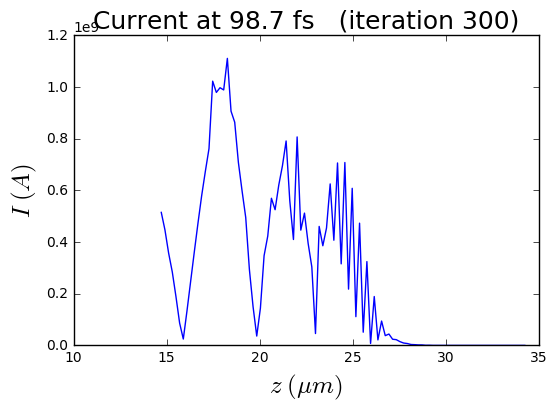

In [11]:
ts_2d.get_current(iteration=300, species='electrons', plot=True);

### Laser diagnostic
The laser diagnostic methods require the user to specify the plane of laser polarisation by setting the argument `pol=` to either `'x'` or `'y'`

#### Laser envelope

This method calculates the envelope of a given laser field. This can be done for a 1D slice of the field or for an entire 2D plane. The resulting data is returned in form of a 1D or 2D array, respectively.

In [12]:
ts_2d.get_laser_envelope(iteration=300, pol='y');

#### Spectrum
This function helps to easily calculate (and plot) the spectrum of a given laser field.

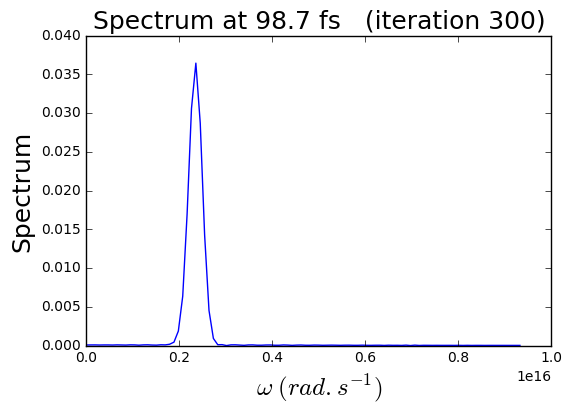

In [13]:
ts_2d.get_spectrum(iteration=300, pol='y', plot=True);

#### Spectrogram
This method does a time-frequency analysis of the laser, by applying the FROG method.

Mathematically:
        $$ s(\omega, \tau) = \left| \int_{-\infty}^{\infty} E(t) |E(t-\tau)|^2
            \exp( -i\omega t) dt \right|^2 $$
            
(Additional matplotlib arguments for the plotting option can directly be passed to the function, e.g `cmap='coolwarm'`
)

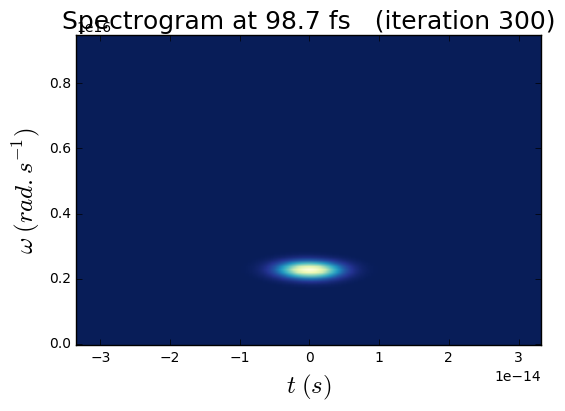

In [14]:
ts_2d.get_spectrogram(iteration=300, pol='y', plot=True, cmap='YlGnBu_r');

#### Main frequency
To calculate the main frequency (i.e. maximum of the spectrum) call. This returns the frequency in $rad.s^{-1}$.

In [15]:
ts_2d.get_main_frequency(iteration=300, pol='y')

2354564459136067.0

#### Laser $a_0$
A method to calculate the laser strenght a0 as given by $$a0 = E_{max} e / (m_e c \omega)$$

In [16]:
ts_2d.get_a0(iteration=300, pol='y')

1.0487245208351785

#### Laser waist

Calculate the waist of a (gaussian) laser pulse (i.e. $\sqrt{2} \sigma_r$, where $\sigma_r$ is the transverse RMS of the field).

In [17]:
ts_2d.get_laser_waist(iteration=300, pol='y')

/Users/rlehe/miniconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


4.1672003016048025e-06

#### Pulse length
Calculate the length of a (gaussian) laser pulse. Here 'length' means the 'longitudinal waist' (i.e $\sqrt{2} \sigma_z$ where $\sigma_z$ is the longitudinal RMS of the field).


In [18]:
ts_2d.get_ctau(iteration=300, pol='y')

2.9495446177558179e-06